**Generates insightful visualizations such as:**
- Total Incoming Calls vs Calls Answered
- Calls Answered Rate Over Time
- Average Wait Time vs Calls Answered Rate.
- Utilizes the trained models to plot:
- Actual vs Predicted Calls Answered for weekly, monthly, and yearly predictions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:

# Load the dataset
df = pd.read_csv('D:/projects/classic learn/sales_pred/datasets/MTA_NYCT_Customer_Engagement_Statistics__2017-2022.csv')
df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))

In [4]:
# Load the trained models
weekly_model = joblib.load('./model/telesales_model_Week.pkl')
monthly_model = joblib.load('./model/telesales_model_Month.pkl')
yearly_model = joblib.load('./model/telesales_model_Year.pkl')

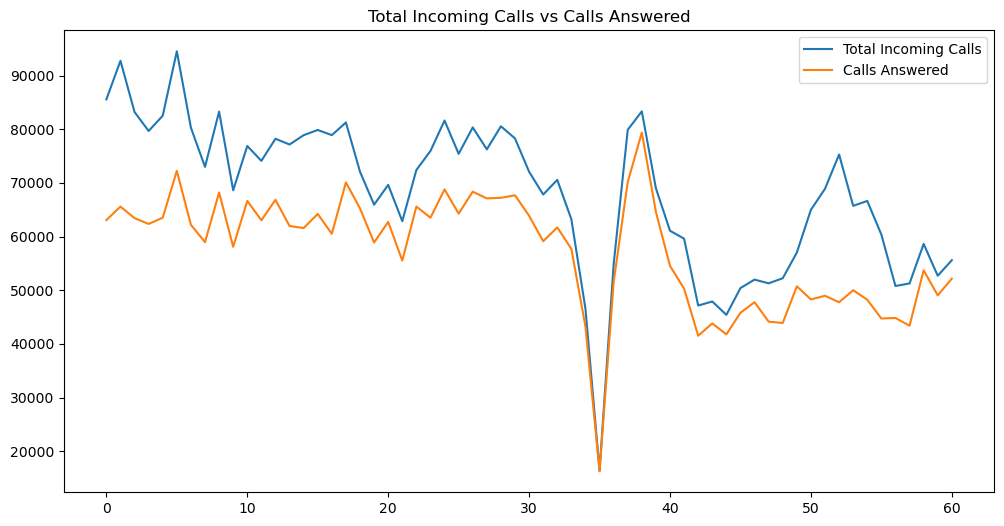

In [5]:
# Plot 1: Total Incoming Calls vs Calls Answered
df[['Total Incoming Calls', 'Calls Answered']].plot(kind='line', figsize=(12, 6), title='Total Incoming Calls vs Calls Answered')
plt.show()

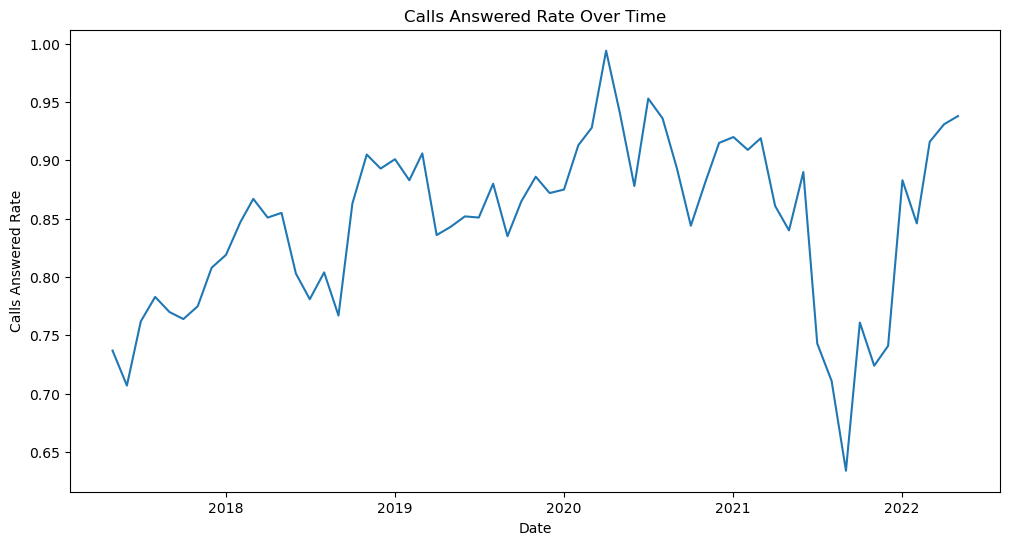

In [6]:
# Plot 2: Calls Answered Rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Calls Answered Rate', data=df)
plt.title('Calls Answered Rate Over Time')
plt.show()

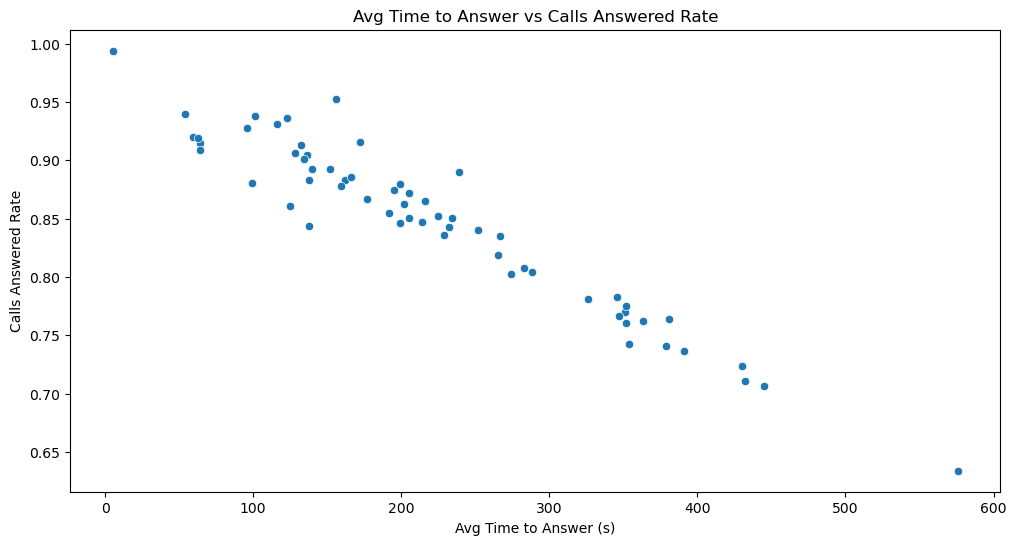

In [7]:
# Plot 3: Average Wait Time vs Answer Rate
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Avg Time to Answer (s)', y='Calls Answered Rate', data=df)
plt.title('Avg Time to Answer vs Calls Answered Rate')
plt.show()

In [ ]:
# importing libraries for Displayed performance metrics (MAE, MSE, R2) for each prediction model.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


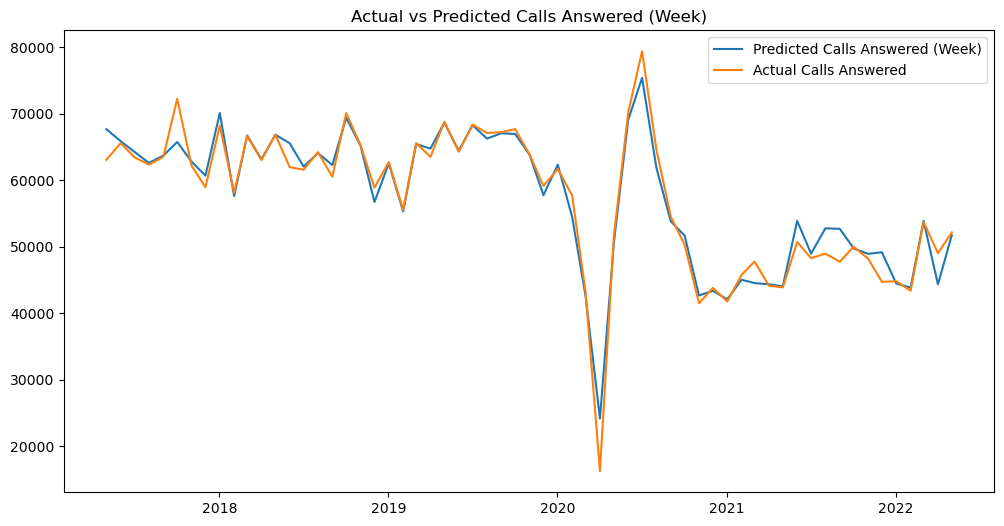

Performance Metrics for Week Prediction:
Mean Absolute Error (MAE): 1401.22
Mean Squared Error (MSE): 4997456.91
R-squared (R2): 0.96



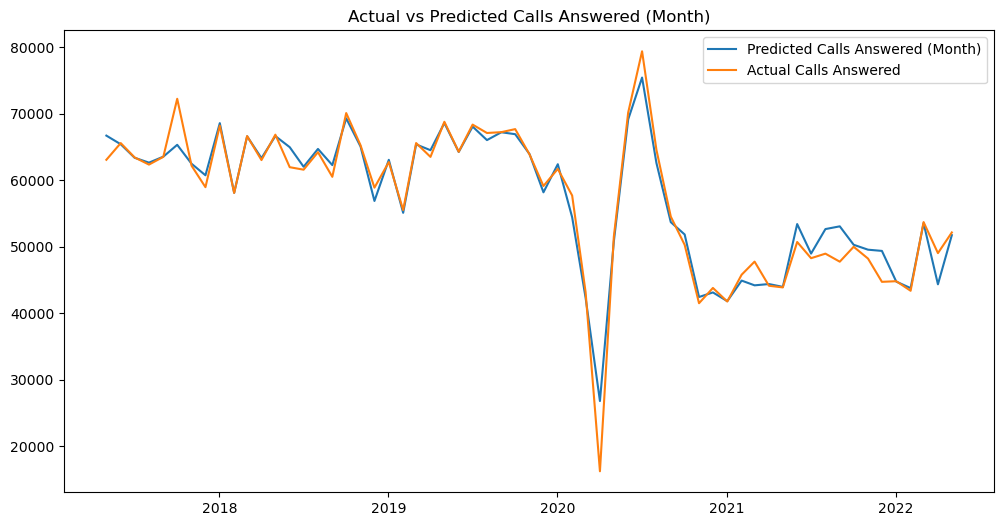

Performance Metrics for Month Prediction:
Mean Absolute Error (MAE): 1383.45
Mean Squared Error (MSE): 5639332.03
R-squared (R2): 0.95



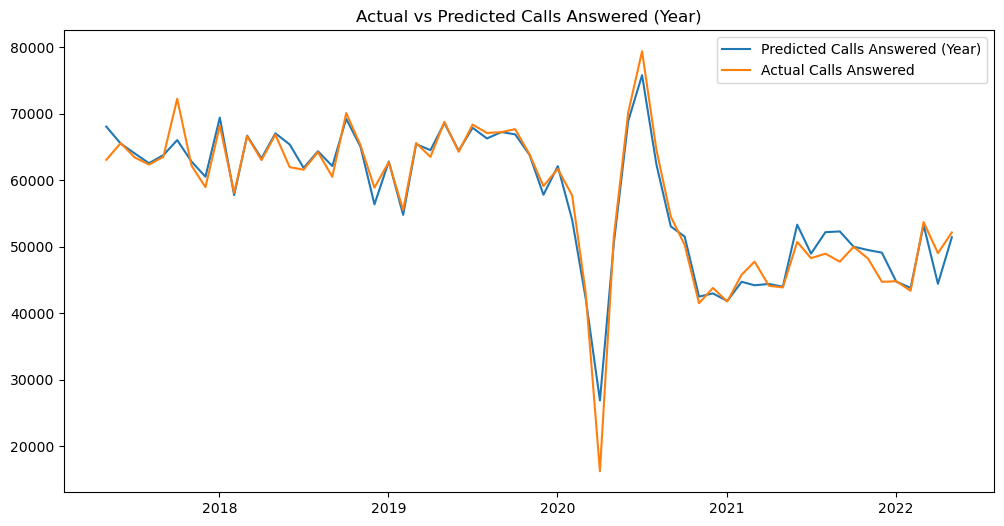

Performance Metrics for Year Prediction:
Mean Absolute Error (MAE): 1437.51
Mean Squared Error (MSE): 5627753.17
R-squared (R2): 0.95

All insights, predictions, and performance metrics charts are generated successfully.


In [10]:
# Prediction Charts
for period, model in zip(['Week', 'Month', 'Year'], [weekly_model, monthly_model, yearly_model]):
    X = df[['Total Incoming Calls', 'Total Wait Time (min)', 'Avg Time to Answer (s)']]
    y_true = df['Calls Answered']
    y_pred = model.predict(X)

    # Performance Metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Plotting the prediction vs actual
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], y_pred, label=f'Predicted Calls Answered ({period})')
    plt.plot(df['Date'], df['Calls Answered'], label='Actual Calls Answered')
    plt.title(f'Actual vs Predicted Calls Answered ({period})')
    plt.legend()
    plt.show()

    # Displaying the performance metrics
    print(f'Performance Metrics for {period} Prediction:')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'R-squared (R2): {r2:.2f}\n')

print('All insights, predictions, and performance metrics charts are generated successfully.')
